In [1]:
%store -r columns_encoded
%store -r columns
%store -r data
%store -r data_encoded

columns_encoded = columns_encoded
columns = columns
data = data
data_encoded = data_encoded

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)

In [3]:
# Remove Pseudonym
data_encoded = data_encoded.drop(columns_encoded.pseudonym, axis=1)
columns_encoded = columns_encoded.drop('pseudonym')
data_encoded.replace()
# Change Geschlecht to nummeric entries
new_column_name = 'Geschlecht (weiblich?)'
data_encoded[columns_encoded.geschlecht] = [sex == 'weiblich' for sex in data_encoded.Geschlecht]
data_encoded.rename(columns={'Geschlecht':new_column_name}, inplace=True)
columns_encoded.geschlecht = new_column_name

# One Hot Encode Funktion und Studiengang Spalte
prefix_funktion = "funktion_"
prefix_studiengang = "studiengang_"

new_columns_funktion = data_encoded[columns_encoded.funktion].str.get_dummies(sep=";")
new_columns_funktion.columns = new_columns_funktion.columns.map(lambda x: prefix_funktion + x)
new_columns_studiengang = data_encoded[columns_encoded.studiengang].str.get_dummies(sep=";")
new_columns_studiengang.columns = new_columns_studiengang.columns.map(lambda x: prefix_studiengang + x)

data_encoded = data_encoded.join(new_columns_funktion)
data_encoded = data_encoded.join(new_columns_studiengang)
data_encoded = data_encoded.drop(columns_encoded.funktion, axis=1)
data_encoded = data_encoded.drop(columns_encoded.studiengang, axis=1)

In [4]:
columns_encoded

alter                                                                                                  Alter
geschlecht                                                                            Geschlecht (weiblich?)
funktion                                                   Welcher Funktion an der HSD fühlst du dich am ...
studiengang                                                Welchem Studiengang fühlst du dich am meisten ...
sportlichkeit                                                 Als wie sportlich würdest du dich einschätzen?
                                                                                 ...                        
lieblingsessen_Dampfnudeln                                                            lieblingsmusiker_Sting
lieblingsessen_Lachs mit Bratkartoffeln und Gurkensalat                    lieblingsmusiker_System of a Down
lieblingsmusiker_6lack                                                             lieblingsmusiker_The 1975
lieblingsmusiker_Ba

In [5]:
data_encoded.head()

,Alter,Geschlecht (weiblich?),Als wie sportlich würdest du dich einschätzen?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,Wie sehr interessierst du dich für Musik?,Wie gerne liest Du?,"Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?","Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?","Wie sehr interessierst du dich für bildende Kunst wie\nMalen, Zeichnen oder Fotografie?",Wie gerne besuchst du Museen?,Wie sehr interessierst du dich für Videospiele?,Wie häufig nutzt du soziale Medien?,"Wie groß ist dein Interesse an Technologie und Innovation,\nwie beispielsweise Programmierung, Robotik und Virtual Reality?","Wie groß ist dein Interesse an Astronomie, Weltraumforschung\noder astronomiebezogenen Aktivitäten?","Wie groß ist dein Interesse an Naturwissenschaften\nwie Biologie, Chemie und Physik?",Wie sehr interessierst du sich für gesellschaftliches\nEngagement und Freiwilligenarbeit?,"Wie groß ist dein Interesse an sozialen Themen wie\nVielfalt, Gleichberechtigung und soziale Gerechtigkeit?",Würdest du dich selbst als introvertiert/extrovertiert\nbezeichnen?,"Hast du häufig Angst etwas zu verpassen, wenn du nicht\nunter Menschen bist?",Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [spontan],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [verwirrt],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [glücklich],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [geduldig],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [streitlustig],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [abenteuerlustig],"Hattest du schon einmal Zweifel daran, ob du dein Studium\nschaffen kannst?",Wie zufrieden bist du mit deinem Studium?,Strebst du nach dem Studium auch weiterhin eine akademische\nLaufbahn an?,Wie gern lernst Du in der Gruppe?,"Prokrastinierst du, wenn du lernen müsstest?",Wie häufig machst du Abgaben auf den letzten Drücker?,Wie gerne probierst du neue Lebensmittel aus?,Wie häufig verbringst du Zeit in der Natur (z. B. beim\nWandern oder Camping)?,Wie häufig verreist du?,Wie interessiert bist du an handwerklichen Tätigkeiten?,Wie gerne magst du Sprachnachrichten?,Wie wichtig ist es dir viel Geld zu verdienen?,sportarten_Basketball,sportarten_Bouldern/Klettern,sportarten_Football,sportarten_Fußball,sportarten_Handball,sportarten_Hockey,sportarten_Kampfsport,sportarten_Leichtathletik,sportarten_Reiten,sportarten_Rennrad/Mountainbike,sportarten_Schwimmen,sportarten_Tanzen,sportarten_Tennis,sportarten_Volleyball,sportarten_Wassersport,sportarten_Wintersport,sportarten_Yoga,lieblingssportart_Badminton,lieblingssportart_Basketball,lieblingssportart_Bogenschießen,lieblingssportart_Bouldern,lieblingssportart_Calisthenics,lieblingssportart_E-Sport,lieblingssportart_Fitness,lieblingssportart_Football,lieblingssportart_Fußball,lieblingssportart_Hockey,lieblingssportart_Inlineskaten,lieblingssportart_Joggen,lieblingssportart_Kampfsport,lieblingssportart_Karate,lieblingssportart_Keine Lieblingssportart,lieblingssportart_Klettern,lieblingssportart_Kraftsport,lieblingssportart_Padel-Tennis,lieblingssportart_Radfahren,lieblingssportart_Reiten,lieblingssportart_Ruderboot fahren,lieblingssportart_Schnorcheln,lieblingssportart_Schwimmen,lieblingssportart_Ski fahren,lieblingssportart_Squash,lieblingssportart_Tanzen,lieblingssportart_Tauchen,lieblingssportart_Tennis,lieblingssportart_Thaiboxen,lieblingssportart_Tischtennis,lieblingssportart_Trampolin,lieblingssportart_Volleyball,lieblingssportart_Yoga,lieblingsessen_Asiatische Nudeln,lieblingsessen_Burger,lieblingsessen_Burrito,lieblingsessen_Butterbrot,lieblingsessen_Carbonara,lieblingsessen_Cordon bleu,lieblingsessen_Curry,lieblingsessen_Dampfnudeln,lieblingsessen_Döner,lieblingsessen_Gemüsepfanne mit Reis,lieblingsessen_Gurke mit Mozzarella und Tofu,lieblingsessen_Humus,lieblingsessen_Hühnchen,

# Frage 1: Wie häufig nutzt du soziale Medien? (Regression & Klassifikation)
Im folgenden werden wir verschiedene Machine Learning Modelle testen, um die Frage "" mithilfe der anderen Fragen zu schätzen. Da diese Frage sowohl als Regressions- als auch Klassifikationsproblem angesehen werden kann, nutzen wir Modelle für beide Varianten und vergleichen die Ergbnisse im Weiteren.

In [6]:
#Split label vom Rest der Daten
y_data_q1 = data_encoded[columns_encoded.social_media]
X_data_q1 = data_encoded.drop(columns_encoded.social_media, axis=1)

In [7]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(X_data_q1, y_data_q1, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix

## Suche nach dem besten Regressionsmodell

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

# Pipeline definieren
pipe_LR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

In [10]:
pipe_LR_q1.fit(X_train_q1, y_train_q1)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [11]:
prediction_LR_q1 = pipe_LR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_LR_q1)

1.0027789907983644

Text(0, 0.5, 'Predicted values')

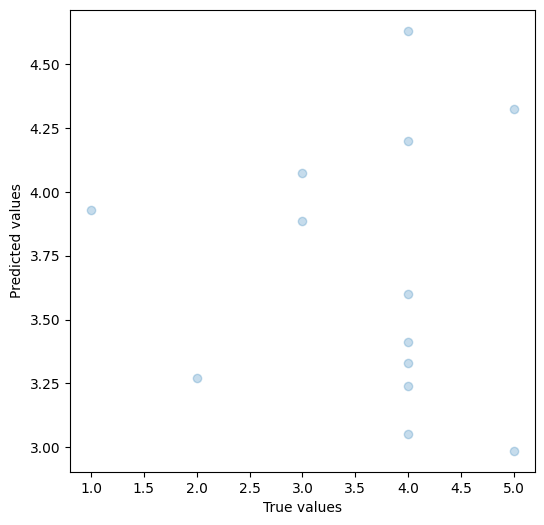

In [12]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_LR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### k-NN Regressor

In [13]:
from sklearn.neighbors import KNeighborsRegressor

# Pipeline definieren
pipe_kNNR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe_kNNR_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [14]:
# Grid Search nach den besten Parametern für das Modell k-NN Regressor
grid_kNNR_q1 = GridSearchCV(estimator=pipe_kNNR_q1,
                   param_grid={
                     'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                     'model__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                     'model__leaf_size': [3, 10, 20, 30, 50, 100],
                     'model__p': [1, 2, 3],
                     'model__metric': ['minkowski', 'precomputed']
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE")

grid_kNNR_q1.fit(X_data_q1, y_data_q1)

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1512 fits failed out of a total of 3024.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
378 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/carlobeckmann/miniconda3/envs/data

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__algorithm': ['ball_tree', 'kd_tree', 'brute',
                                              'auto'],
                         'model__leaf_size': [3, 10, 20, 30, 50, 100],
                         'model__metric': ['minkowski', 'precomputed'],
                         'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                         'model__p': [1, 2, 3]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)})

In [15]:
prediction_kNNR_q1 = grid_kNNR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_kNNR_q1)

0.7692307692307694

Text(0, 0.5, 'Predicted values')

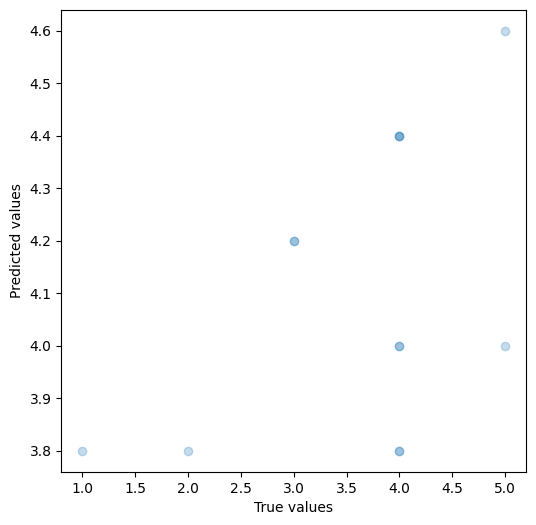

In [16]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_kNNR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

pipe_RFR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestRegressor())
])

pipe_RFR_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': None,
 'model__max_features': 1.0,
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [18]:
grid_RFR_q1 = GridSearchCV(estimator=pipe_RFR_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFR_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_es

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

In [19]:
prediction_RFR_q1 = grid_RFR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_RFR_q1)

0.8153846153846154

Text(0, 0.5, 'Predicted values')

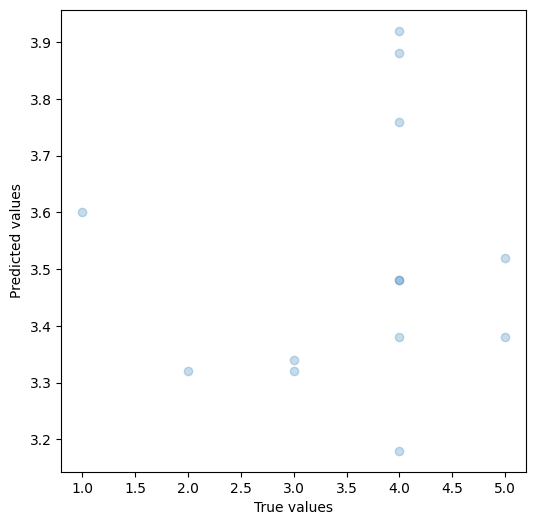

In [20]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_RFR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

pipe_GBR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingRegressor(loss='absolute_error'))
])

pipe_GBR_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingRegressor(loss='absolute_error'))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingRegressor(loss='absolute_error'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__alpha': 0.9,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'absolute_error',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [22]:
grid_GBR_q1 = GridSearchCV(estimator=pipe_GBR_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBR_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__su

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingRegressor(loss='absolute_error'))]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

In [23]:
prediction_GBR_q1 = grid_GBR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_GBR_q1)

0.9230769230769231

Text(0, 0.5, 'Predicted values')

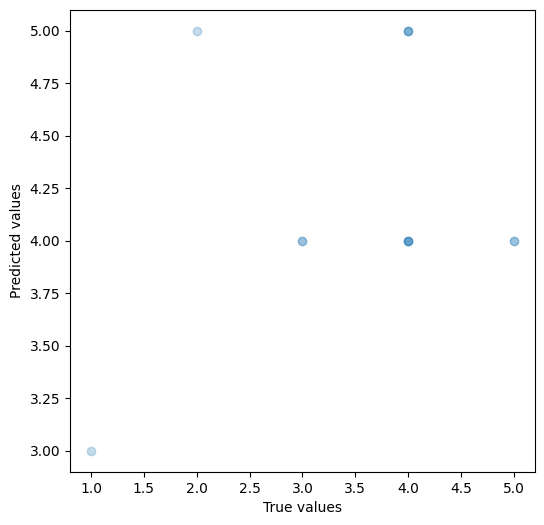

In [24]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_GBR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Ergebnis:

## Suche nach dem besten Klassifikationsmodell

### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

pipe_RFC_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestClassifier())
])

pipe_RFC_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [26]:
grid_RFC_q1 = GridSearchCV(estimator=pipe_RFC_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFC_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s


/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=3, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

<Axes: >

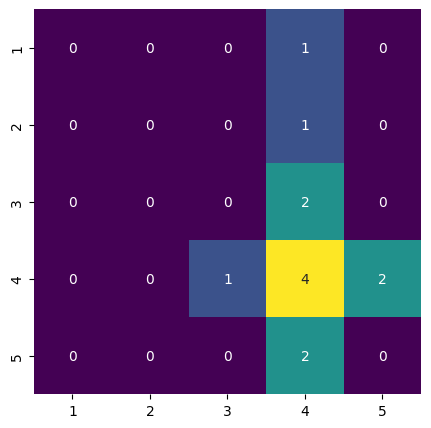

In [27]:
prediction_RFC_q1 = grid_RFC_q1.predict(X_test_q1)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q1, prediction_RFC_q1),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q1.classes_,
           yticklabels=grid_RFC_q1.classes_)

In [28]:
mean_absolute_error(y_test_q1, prediction_RFC_q1)

0.9230769230769231

Text(0, 0.5, 'Predicted values')

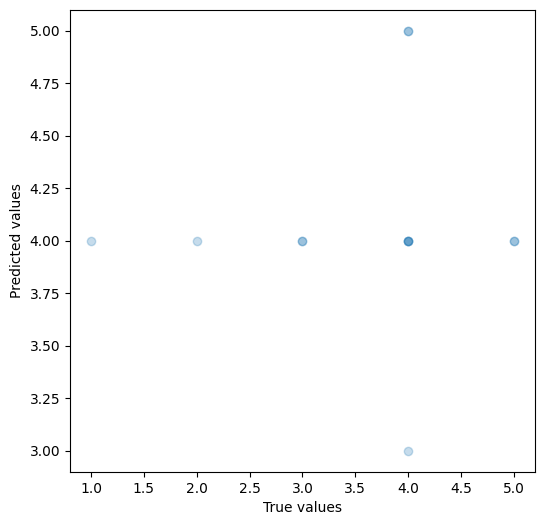

In [29]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_RFC_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### k-NN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

pipe_kNNC_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

pipe_kNNC_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [31]:
grid_kNNC_q1 = GridSearchCV(estimator=pipe_kNNC_q1,
                   param_grid={
                      'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                      'model__leaf_size': [5, 15, 30, 50, 100, 200],
                      'model__p': [1, 2, 4],
                      'model__weights': ['uniform', 'distance']

                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_kNNC_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform;

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neigh

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [5, 15, 30, 50, 100, 200],
                         'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                         'model__p': [1, 2, 4],
                         'model__weights': ['uniform', 'distance']},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

<Axes: >

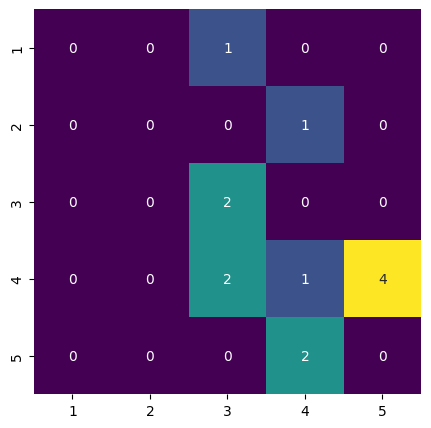

In [32]:
prediction_kNNC_q1 = grid_kNNC_q1.predict(X_test_q1)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q1, prediction_kNNC_q1),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q1.classes_,
           yticklabels=grid_RFC_q1.classes_)

In [33]:
mean_absolute_error(y_test_q1, prediction_kNNC_q1)

0.9230769230769231

Text(0, 0.5, 'Predicted values')

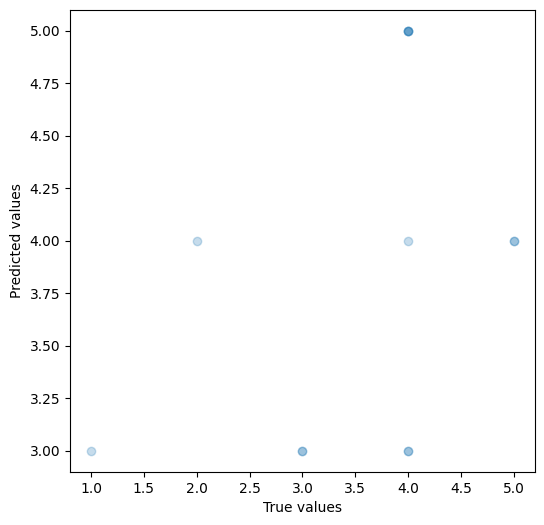

In [34]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_kNNC_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_GBC_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingClassifier())
])

pipe_GBC_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'log_loss',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [36]:
grid_GBC_q1 = GridSearchCV(estimator=pipe_GBC_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBC_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__su

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=50, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=50, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, mo

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

<Axes: >

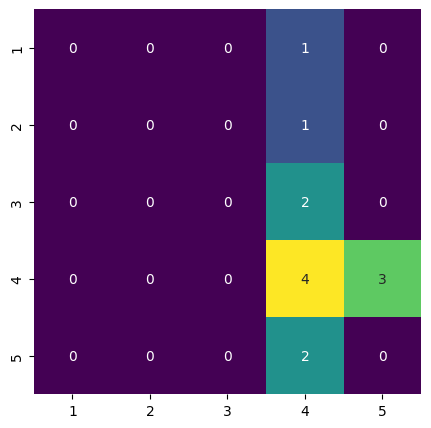

In [37]:
prediction_GBC_q1 = grid_GBC_q1.predict(X_test_q1)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q1, prediction_GBC_q1),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q1.classes_,
           yticklabels=grid_RFC_q1.classes_)

In [38]:
mean_absolute_error(y_test_q1, prediction_GBC_q1)

0.9230769230769231

Text(0, 0.5, 'Predicted values')

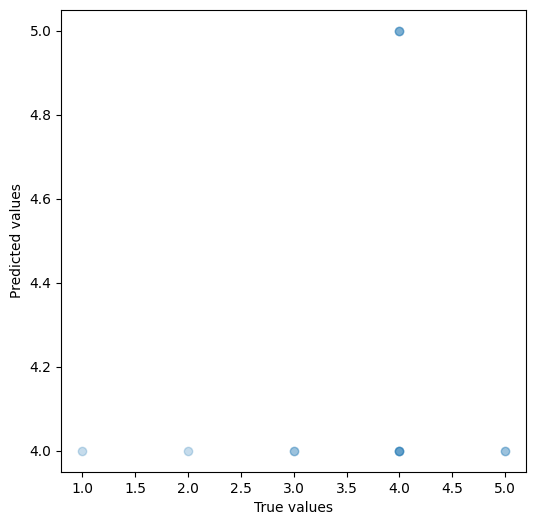

In [39]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_GBC_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Ergebnis:


## Bestes Modell für Frage 1

# Frage 2: Welche Sportarten interessieren dich am meisten (wähle maximal 5)? Sportart Fußball (Klassifikation)
Im folgenden werden wir verschiedene Machine Learning Modelle testen, um die Frage "Welche Sportarten interessieren dich am meisten (wähle maximal 5)?" bezüglich der Sportart Fußball mithilfe der anderen Fragen zu schätzen. Dafür werden verschiedene Klassifikationsmodelle von uns verglichen, um das beste Modell zu ermitteln.

In [40]:
#Split label vom Rest der Daten

y_data_q2 = data_encoded[columns_encoded.sportarten_Fußball]
X_data_q2 = data_encoded.drop(columns_encoded.sportarten_Fußball, axis=1)

In [41]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(X_data_q2, y_data_q2, test_size=0.2, random_state=0)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix

### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

pipe_RFC_q2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestClassifier())
])

pipe_RFC_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [44]:
grid_RFC_q2 = GridSearchCV(estimator=pipe_RFC_q2,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFC_q2.fit(X_train_q2, y_train_q2)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_es

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

<Axes: >

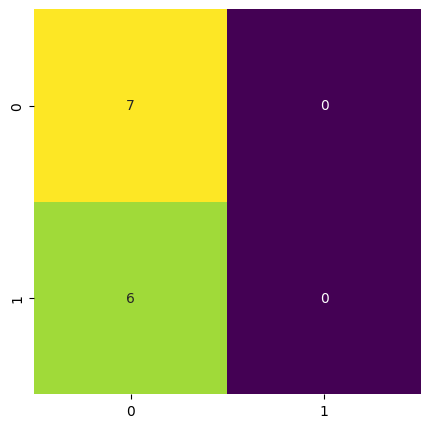

In [45]:
prediction_RFC_q2 = grid_RFC_q2.predict(X_test_q2)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q2, prediction_RFC_q2),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q2.classes_,
           yticklabels=grid_RFC_q2.classes_)

In [46]:
mean_absolute_error(y_test_q2, prediction_RFC_q2)

0.46153846153846156

Text(0, 0.5, 'Predicted values')

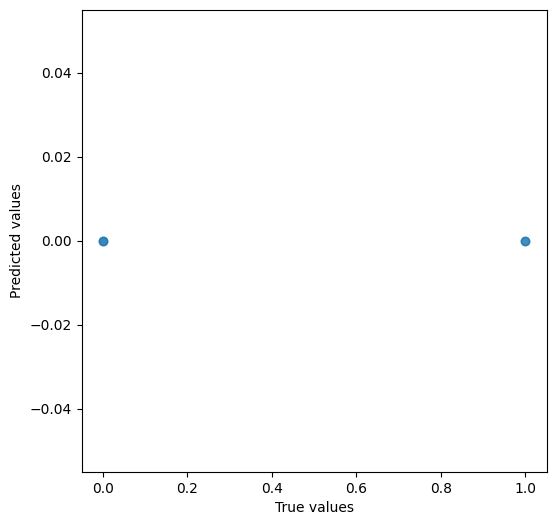

In [47]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q2, prediction_RFC_q2, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### k-NN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

pipe_kNNC_q2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

pipe_kNNC_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [49]:
grid_kNNC_q2 = GridSearchCV(estimator=pipe_kNNC_q2,
                   param_grid={
                      'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                      'model__leaf_size': [5, 15, 30, 50, 100, 200],
                      'model__p': [1, 2, 4],
                      'model__weights': ['uniform', 'distance']

                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_kNNC_q2.fit(X_train_q2, y_train_q2)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform;

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [5, 15, 30, 50, 100, 200],
                         'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                         'model__p': [1, 2, 4],
                         'model__weights': ['uniform', 'distance']},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

<Axes: >

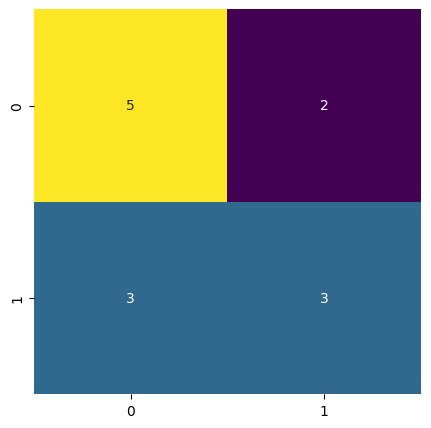

In [50]:
prediction_kNNC_q2 = grid_kNNC_q2.predict(X_test_q2)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q2, prediction_kNNC_q2),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q2.classes_,
           yticklabels=grid_RFC_q2.classes_)

In [51]:
mean_absolute_error(y_test_q2, prediction_kNNC_q2)

0.38461538461538464

Text(0, 0.5, 'Predicted values')

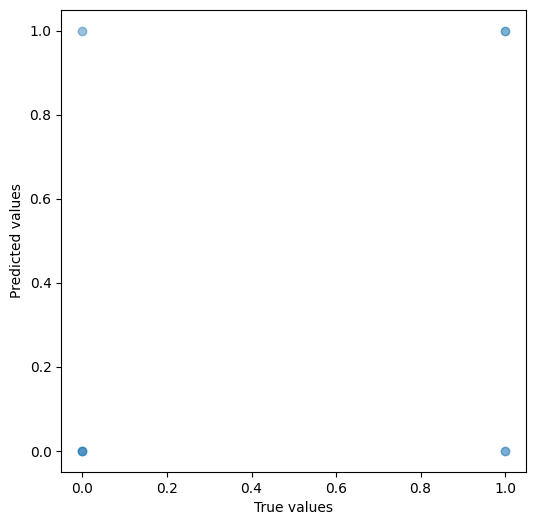

In [52]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q2, prediction_kNNC_q2, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_GBC_q2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingClassifier())
])

pipe_GBC_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'log_loss',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [54]:
grid_GBC_q2 = GridSearchCV(estimator=pipe_GBC_q2,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBC_q2.fit(X_train_q2, y_train_q2)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__su

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

<Axes: >

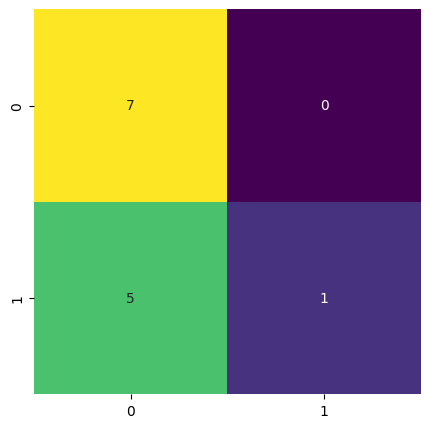

In [55]:
prediction_GBC_q2 = grid_GBC_q2.predict(X_test_q2)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q2, prediction_GBC_q2),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q2.classes_,
           yticklabels=grid_RFC_q2.classes_)

In [56]:
mean_absolute_error(y_test_q2, prediction_GBC_q2)

0.38461538461538464

Text(0, 0.5, 'Predicted values')

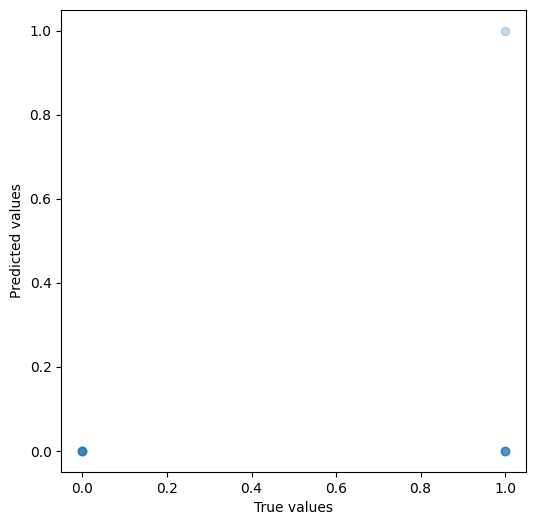

In [57]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q2, prediction_GBC_q2, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Ergebnis:


## Bestes Modell für Frage 2

# Frage 3: Alter? (Regression)
Im folgenden werden wir verschiedene Machine Learning Modelle testen, um das Alter mithilfe der anderen Fragen zu schätzen. Dafür werden verschiedene Regressionsmodelle von uns verglichen, um das beste Modell zu ermitteln.

In [58]:
#Split label vom Rest der Daten

y_data_q3 = data_encoded[columns_encoded.alter]
X_data_q3 = data_encoded.drop(columns_encoded.alter, axis=1)

In [59]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train_q3, X_test_q3, y_train_q3, y_test_q3 = train_test_split(X_data_q3, y_data_q3, test_size=0.2, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix

### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

# Pipeline definieren
pipe_LR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

In [62]:
pipe_LR_q3.fit(X_train_q3, y_train_q3)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [63]:
prediction_LR_q3 = pipe_LR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_LR_q3)

3.055140555946074

Text(0, 0.5, 'Predicted values')

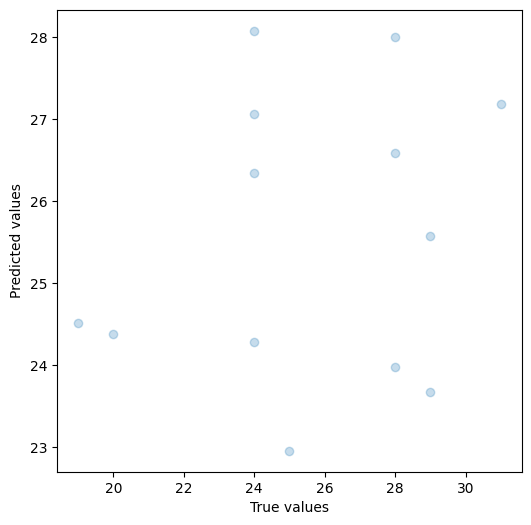

In [64]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_LR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### k-NN Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor

# Pipeline definieren
pipe_kNNR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe_kNNR_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [66]:
# Grid Search nach den besten Parametern für das Modell k-NN Regressor
grid_kNNR_q3 = GridSearchCV(estimator=pipe_kNNR_q3,
                   param_grid={
                     'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                     'model__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                     'model__leaf_size': [3, 10, 20, 30, 50, 100],
                     'model__p': [1, 2, 3],
                     'model__metric': ['minkowski', 'precomputed']
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE")

grid_kNNR_q3.fit(X_data_q3, y_data_q3)

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1512 fits failed out of a total of 3024.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
378 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/carlobeckmann/miniconda3/envs/data

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__algorithm': ['ball_tree', 'kd_tree', 'brute',
                                              'auto'],
                         'model__leaf_size': [3, 10, 20, 30, 50, 100],
                         'model__metric': ['minkowski', 'precomputed'],
                         'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                         'model__p': [1, 2, 3]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)})

In [67]:
prediction_kNNR_q3 = grid_kNNR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_kNNR_q3)

2.246153846153846

Text(0, 0.5, 'Predicted values')

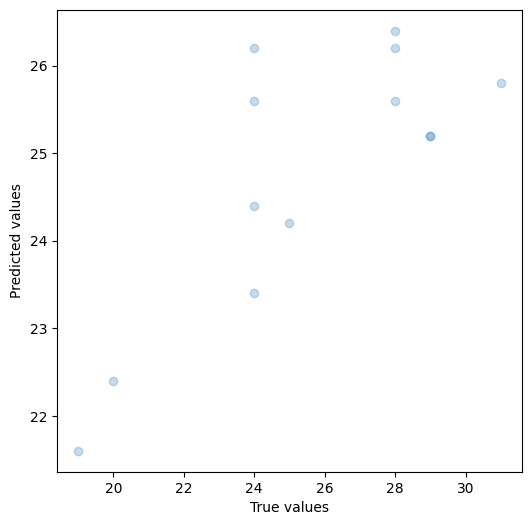

In [68]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_kNNR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

pipe_RFR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestRegressor())
])

pipe_RFR_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': None,
 'model__max_features': 1.0,
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [70]:
grid_RFR_q3 = GridSearchCV(estimator=pipe_RFR_q3,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFR_q3.fit(X_train_q3, y_train_q3)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_es

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

In [71]:
prediction_RFR_q3 = grid_RFR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_RFR_q3)

2.869822695983019

Text(0, 0.5, 'Predicted values')

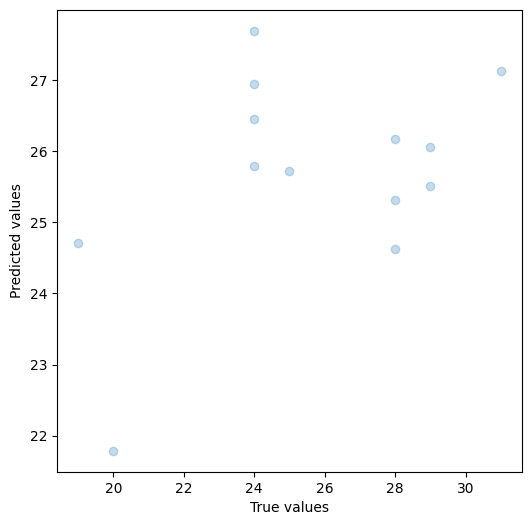

In [72]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_RFR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Gradient Boosting Regressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

pipe_GBR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingRegressor(loss='absolute_error'))
])

pipe_GBR_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingRegressor(loss='absolute_error'))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingRegressor(loss='absolute_error'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__alpha': 0.9,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'absolute_error',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [74]:
grid_GBR_q3 = GridSearchCV(estimator=pipe_GBR_q3,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBR_q3.fit(X_train_q3, y_train_q3)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__su

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingRegressor(loss='absolute_error'))]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

In [75]:
prediction_GBR_q3 = grid_GBR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_GBR_q3)

2.8017596566547054

Text(0, 0.5, 'Predicted values')

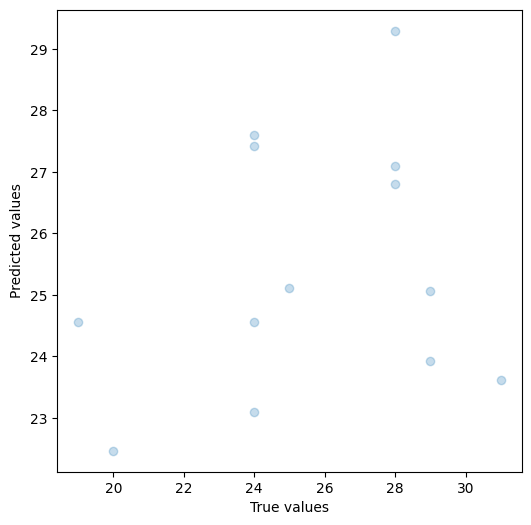

In [76]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_GBR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Ergebnis:

## Bestes Modell für Frage 3